## Sample uniform priors to check jump proposals!

In [1]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
# from enterprise.signals.parameter import sample
import numpy as np
from impulse.base import PTSampler, Sampler
from impulse.pta_utils import initial_sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

from impulse.pta_utils import setup_sampler

from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc

Do not have acor package


In [2]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [3]:
pta = model_2a(psrs, noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [4]:
ntemps = 4
nchains = None
ndim, x0 = initial_sample(pta, ntemps, nchains)

In [5]:
sampler = setup_sampler(pta, ret_chain=True, prior_sample=True, resume=False, num_samples=5e6, ntemps=4, ncores=4)

2022-07-25 17:31:28.665 | INFO     | impulse.pta_utils:setup_sampler:1111 - Adding red noise prior draws...

2022-07-25 17:31:28.668 | INFO     | impulse.pta_utils:setup_sampler:1146 - Adding GWB uniform distribution draws...



In [6]:
sampler.sample()

  0%|          | 0/5000 [00:00<?, ?it/s]2022-07-25 17:31:28.754 | DEBUG    | impulse.base:_ptstep:189 - Using 4 cpus
(mh_sample_step pid=81854) WARNING: AstropyDeprecationWarning: The private astropy._erfa module has been made into its own package, pyerfa, which is a dependency of astropy and can be imported directly using "import erfa" [astropy._erfa]
(mh_sample_step pid=81854) /Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
(mh_sample_step pid=81854)   logpdf = np.log(self.prior(value, **kwargs))
(raylet) Spilled 3434 MiB, 2 objects, write throughput 1300 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))
2022-07-25 17:31:34.563 | DEBUG    | impulse.base:_ptstep:189 - Using 4 cpus
(raylet) Spilled 6869 MiB, 4 objects, write t

KeyboardInterrupt: 

In [177]:
chain = sampler.sample()

 59%|█████▉    | 2949/5000 [3:17:17<2:27:15,  4.31s/it]

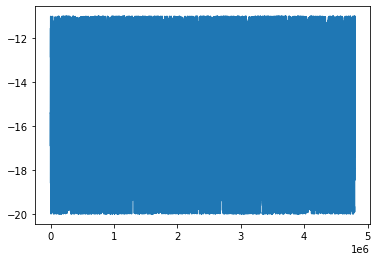

In [149]:
plt.plot(sampler.full_chain[200000::, 5])
plt.show()

In [153]:
integrated_time(sampler.full_chain[200000::, 1], quiet=True)

array([1246.65660108])

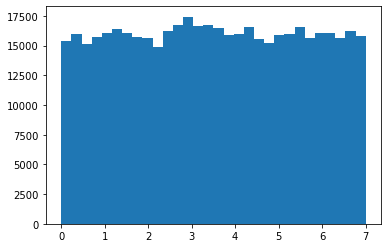

In [171]:
plt.hist(sampler.full_chain[200000::10, 20], bins=30)
plt.show()

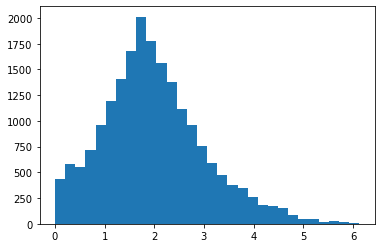

In [50]:
plt.hist(chain2[::, 0], bins=30)
plt.show()

In [72]:
x0 = np.hstack([p.sample() for p in pta.params])
ndim = len(x0)
cov = np.diag(np.ones(ndim))

outDir = './chains/sngl/'

sampler2 = ptmcmc(ndim, pta.get_lnprior, lambda x: 0, cov,
                 outDir=outDir, resume=False)

N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler2.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50)

/Users/aaron/Documents/GitHub/enterprise/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 9.859322 s Acceptance rate = 0.688856Adding DE jump with weight 50
Finished 99.90 percent in 1046.863978 s Acceptance rate = 0.238663
Run Complete


In [82]:
integrated_time(chain2[20000:, 1], quiet=True)

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1598;
tau: [2293.68965311]


array([2293.68965311])

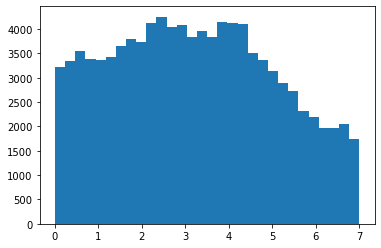

In [73]:
plt.hist(chain2[::, 2], bins=30)
plt.show()

In [53]:
outDir = './chains/sngl/'
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

In [54]:
integrated_time(chain2[:, 1], quiet=True)

The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1998;
tau: [2043.73200205]


array([2043.73200205])

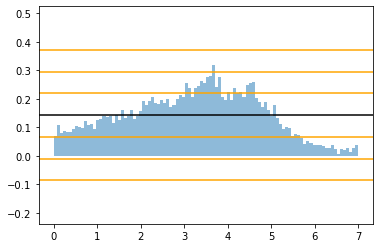

In [40]:
counts, bins, __ = plt.hist(chain[::22, 0], bins=100, density=True, alpha=0.5)
mean = np.mean(counts)
sigma = np.std(counts)
plt.axhline(mean, color='k')
for i in range(1, 4):
    plt.axhline(mean + i * sigma, color='orange')
    plt.axhline(mean - i * sigma, color='orange')
plt.ylim([mean - 5 * sigma, mean + 5 * sigma])
plt.show()

In [9]:
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params

In [10]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/data/psrs.pkl'

In [73]:
pta = model_2a(psrs, noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True)

In [75]:
x0 = np.array(list(sample_params(pta.params).values()))

In [77]:
chain = sample(pta.get_lnprior, len(pta.params), x0, num_samples=1_000_000)

  8%|▊         | 82/990 [01:24<15:32,  1.03s/it]


LinAlgError: Matrix is not positive definite